# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, I gathered all the datasets needed for this project to be completed successfully, through manual downloads, programmatic download and getting data from API.

In [1]:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read twitter_archive_enhanced file into a dataframe

tweet_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the tsv file from the given url

tweet_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(tweet_url, allow_redirects=True)

In [4]:
# writing the content of the request object to our file..

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [5]:
# using programmatic methed to download the tweet_json.txt since i was not able to use the twitter API

tweet_json_url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
tweet_json_r = requests.get(tweet_json_url, allow_redirects=True)

with open('tweet_json.txt', 'wb') as outfile:
    outfile.write(tweet_json_r.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# read file and store in a dataframe....

with open('tweet_json.txt', encoding='utf-8') as tweet_info:
    df_list = []
    for line in tweet_info:
        data = json.loads(line)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df_list.append({
            'tweet_id': tweet_id,
            'favorite_count': favorite_count,
            'retweet_count': retweet_count
        })
        
tweets_df = pd.DataFrame(df_list, columns=['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# Take a look at the top 5 rows/entries.

tweets_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


There are 3 columns in the `tweets_df` dataset which consist of `tweet_id`, `favoruite_count` and `retweet_count` columns

In [9]:
tweets_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


There are 2354 entries in the `tweets_df` dataset

In [10]:
# Get the information about the dataset with `.info()` so as to be able to see the data types, entries present and so on.

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


There are 2354 entries in the `tweets_df` dataset having 3 columns and no null values present

In [11]:
# checking for duplicate entries

tweets_df.duplicated().sum()

0

There are no duplicates in the dataset

In [12]:
# get a look at sample from the dataset..

tweet_enhanced_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
758,778408200802557953,NaN,NaN,2016-09-21 01:39:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RIP Loki. Thank you for the good times. You wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778408200...,14,10,None,None,None,None,None
1751,678991772295516161,NaN,NaN,2015-12-21 17:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If your Monday isn't going so well just take a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678991772...,12,10,None,None,None,None,None
145,863553081350529029,NaN,NaN,2017-05-14 00:34:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a backpup vocalist for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863553081...,13,10,Neptune,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


Upon visually assessing the dataset, it can be seen that some of the columns contain null values in them.

In [13]:
tweet_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>There are a total of 17 columns in this dataset.<br>
>It could be seen from the above executed cell that there are information of retweets in the following columns `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`. There seems to be 181 retweets in the tweet_enhanced_df dataset

>Also, `expanded_urls` contains null values and this needs to be dealt with.

In [14]:
# taking a look the `rating_numerator` and `rating_denominator` columns so as to do visual assessment and also find issues

tweet_enhanced_df[['rating_numerator','rating_denominator']].sample(5)

,rating_numerator,rating_denominator
2291,10,10
1496,10,10
1,13,10
1900,10,10
2307,12,10


>There are instances where the `rating_numerator` is way above the normal values and so there seems to be wrong values in the `rating_numerator` column.
>This gives an impression that the `rating_numerator` column might have been a float data type instead of int

In [15]:
tweet_enhanced_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>As said about the `rating_numrator` column, the `rating_denominator` column also has inaccurate values

In [16]:
tweet_enhanced_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

It can be seen that, there are only four(4) different device sources of tweets in this dataset.
1. Twitter for iPhone
2. Vine - Make a Scene
3. Twitter Web Client
4. TweetDeck

And all of them are inside html ancho tags.

In [17]:
image_preds = pd.read_csv('image_predictions.tsv', sep='\t')


In [18]:
image_preds.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,Greater_Swiss_Mountain_dog,0.519428,True,boxer,0.121500,True,Staffordshire_bullterrier,0.114498,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
825,693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,1,golden_retriever,0.989333,True,Labrador_retriever,0.007946,True,kuvasz,0.000749,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False


In [19]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


From the table above, it could be seen that
1. There are 2075 entries in the dataset.
2. most of the images that corresponded to the most confident prediction was labelled as 1. Meaning, the algorithm mostly used the first image in the tweet for it prediction.

In [20]:
# checkin for null values in the image_preds dataset

image_preds.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

There are no null values in the `image_preds` dataset.

In [21]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues

`tweet_enhanced_df` table:

1. The `tweet_enhanced_df` dataset, thus `text`,`retweeted_status_id`,
    `retweeted_status_user_id`,	`retweeted_status_timestamp` columns contain 
    some information on retweets and replies but we don't need them, only ratings.

2. Empty/null values in `in_reply_to_status_id`,
    `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`,	`retweeted_status_timestamp`.

3. `source` of a tweet is in html anchor  tags and also has an object data type.

4. `timestamp` column has an object data type and contains two(2) values thus `date` and `time`.  
 
5. `rating_numerator` and `rating_denominator` columns have int64 data type and also contains incorrect values.

6. missing records in `expanded_urls`.

7. `p1_conf`, `p2_conf` and `p2_conf` are decimals and their column names are not easy to read and understand.

8. `tweet_id` columns in all three(3) datasets has an int64 data type.



### Tidiness issues

`tweet_enhanced_df` table:

9. `doggo`, `floofer`, `pupper` and `puppo` columns should be under one column `dog_type`

10. Merging of the three datasets into a single dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
tweets_df_clean = tweets_df.copy()
tweet_enhanced_df_clean = tweet_enhanced_df.copy()
image_prediction_clean = image_preds.copy()

### Issue #1: Tweet_enhanced_df table/dataset still contains retweets and replies.

#### Define:
All retweet_status_id column must be null since we dont need retweets in the dataset.<br>

Remove rows with information of retweets from the dataset by:
1. Getting the subset of tweets that do not have retweet information that is, retweet_status_id and in_reply_to_status are not null.

#### code:

In [23]:
# retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

tweet_enhanced_df_clean = tweet_enhanced_df_clean.loc[tweet_enhanced_df['retweeted_status_id'].isnull()]

In [24]:
# get subset of data where there isn't a reply, i.e., where in_reply_to_status_id or in_reply_to_user_id is null.

tweet_enhanced_df_clean = tweet_enhanced_df_clean.loc[tweet_enhanced_df['in_reply_to_status_id'].isnull()]

#### Test:

In [25]:
tweet_enhanced_df_clean.retweeted_status_id.notnull().sum()

0

In [26]:
tweet_enhanced_df_clean.in_reply_to_status_id.notnull().sum()

0

Now there are no retweets nor replies to tweets in the dataset.

### Issue #2: Empty/null values in in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,	retweeted_status_timestamp.


#### Define:
`in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`,	`retweeted_status_timestamp` contain null values which represent identities and besides these column will not be useful in the anlysis stage, therefore dropping them will be a good idea.


#### Code

In [27]:
tweet_enhanced_df_clean.drop(labels=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)

#### Test

In [28]:
assert len(tweet_enhanced_df_clean.columns) != len(tweet_enhanced_df.columns)
tweet_enhanced_df_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1797,677269281705472000,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None


### Issue #3: `source` of a tweet is in html anchor  tags and also has an object data type.

#### Define: 
Replace the four different device sources by their respective sources(proper string/text) which can be found in the html anchor tags.
1. < a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone< /a > will be replaced with `Twitter for iPhone`
2. < a href="http://vine.co" rel="nofollow">Vine - Make a Scene< /a >  will be replaced with `Vine - Make a Scene`
3. < a href="http://twitter.com" rel="nofollow">Twitter Web Client< /a >  will be replaced with `Twitter Web Client`
4. < a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck< /a > will be replaced with `TweetDeck`

After replacing them, we'll then convert the `source` column to categorical data type.

#### Code

In [29]:
# Replace all links and remove those from the vine platform

tweet_enhanced_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
device_1 = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
device_2 = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
device_3 = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
device_4 = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [31]:
tweet_enhanced_df_clean.source = tweet_enhanced_df_clean.source.str.replace(device_1, 'Twitter for iPhone')
tweet_enhanced_df_clean.source = tweet_enhanced_df_clean.source.str.replace(device_2, 'Vine - Make a Scene')
tweet_enhanced_df_clean.source = tweet_enhanced_df_clean.source.str.replace(device_3, 'Twitter Web Client')
tweet_enhanced_df_clean.source = tweet_enhanced_df_clean.source.str.replace(device_4, 'TweetDeck')

#### Test

In [32]:
tweet_enhanced_df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4: `timestamp` column has an object data type and also consist of two values that is date and time

#### Define
Timestamp column must be converted to a pandas datetime data type.
1. First convert `timestamp` column to datatime using .to_datetime() function
2. Get the date using .dt.normalize() function
3. Get the day of the week from the date using .dt.day_name() function.

#### Code

In [33]:
# convert the timestamp column to a datetime data type.

tweet_enhanced_df_clean['timestamp'] = tweet_enhanced_df_clean['timestamp'].astype('datetime64[ns]')

In [34]:
# get only the date part of the timestamp

tweet_enhanced_df_clean['date'] = tweet_enhanced_df_clean.timestamp.dt.normalize()

In [35]:
# get the actual day of the week from the timestamp column

tweet_enhanced_df_clean['day'] = tweet_enhanced_df_clean.timestamp.dt.day_name()

In [36]:
# Drop the timestamp column since we've create a date and a day field out of it.

tweet_enhanced_df_clean.drop(['timestamp'], inplace=True, axis=1)

#### Test

In [37]:
assert 'timestamp' not in tweet_enhanced_df_clean.columns
assert 'date' in tweet_enhanced_df_clean.columns
assert 'day' in tweet_enhanced_df_clean.columns

### Issue #5. `rating_numerator` and `rating_denominator` columns have int64 data type and also contains incorrect values.

### Define:
1. We will convert `rating_numerator` and `rating_denominator` to float data type
2. We'll fetch the row without the incorrect/inaccurate entries. such as rows having a `rating_denominator` to less or equal to 10 and also with `rating_numerator` greater than 100. (420/10, 666/10, 960/0, 1776/10 etc). These type of ratings doesn't make sense in WeRateDogs' rating system.
3. In the actuall text of the tweet, some of the ratings contains floats and not integers, upon visual assessment. With this idea in mind, we can get those tweet text containing folating numbers and replace them their rating_numerators accordingly.

### Code

In [38]:
# take a look at a sample of the ratings

tweet_enhanced_df_clean[['rating_numerator','rating_denominator']].sample(10)

,rating_numerator,rating_denominator
168,13,10
733,12,10
942,11,10
1639,10,10
497,13,10
1103,8,10
373,13,10
2278,12,10
1804,12,10
909,11,10


Upon visually assessing some part of the twitter enhanced dataset, it was seen that some part of the data consist of floating point numbers as their rating_numerator values hence the need to convert these two(2) columns to a float data type

In [39]:
# select rows that do not have very large rating_numerator and very low rating_denominator

tweet_enhanced_df_clean = tweet_enhanced_df_clean[~((tweet_enhanced_df_clean['rating_numerator']>100) & (tweet_enhanced_df_clean['rating_denominator']<100))]

In [40]:
# convert data type of rating_numerator and rating_denominator into float data type

tweet_enhanced_df_clean['rating_numerator'] = tweet_enhanced_df_clean['rating_numerator'].astype('float64')
tweet_enhanced_df_clean['rating_denominator'] = tweet_enhanced_df_clean['rating_denominator'].astype('float64')

In the above code cell, we set the rating_numerator and rating_denominator to a float data type.

In [41]:
# getting the ratings which consist of floating point numbers.

floating_vals = tweet_enhanced_df_clean.loc[tweet_enhanced_df_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
floating_vals

,0
45,13.5
695,9.75
763,11.27
1712,11.26


Above are the actual correct values of the some the wrong rating_numerator values which we extracted from the actual text of the tweets.

In [42]:
# setting the wrong input of rating_numerator to their actual values

tweet_enhanced_df_clean.at[45, 'rating_numerator'] = 13.5
tweet_enhanced_df_clean.at[695, 'rating_numerator'] = 9.75
tweet_enhanced_df_clean.at[763, 'rating_numerator'] = 11.27

In the above cell, we're setting/replacing the wrong values of rating_numerator to their correct values as written in the text of the tweet.

### Test

In [43]:
assert tweet_enhanced_df_clean.rating_numerator.dtype == 'float64'

In [44]:
assert tweet_enhanced_df_clean.rating_denominator.dtype == 'float64'

In [45]:
tweet_enhanced_df_clean[(tweet_enhanced_df_clean['rating_numerator']>100) & (tweet_enhanced_df_clean['rating_denominator']<100)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,day


In [46]:
tweet_enhanced_df_clean.loc[tweet_enhanced_df_clean.text.str.contains('(\d+\.\d+\/)')].rating_numerator

45      13.50
695      9.75
763     11.27
1712    26.00
Name: rating_numerator, dtype: float64

From the above cell executions, the int64 data type of the rating_numerator and rating_denominator have been converted to an appropriate float data type. Also, values that had very large rating_numerator and very low rating_denominator have be removed from the dataset.

### Issue 6. missing records in `expanded_urls`.


### Define
Check for null/empty values in the `expanded_urls` column and remove them from the dataset since we don't know the actual url.

### Code

In [47]:
tweet_enhanced_df_clean.expanded_urls.isnull().sum()

3

As seen in the above cell, there are 58 null/empty rows in the `expanded_urls` columns that need to be dealt with.

In [48]:
tweet_enhanced_df_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [49]:
# in this cell we're going to drop the null values in the `expanded_urls` column.

tweet_enhanced_df_clean['expanded_urls'].dropna(inplace=True, axis=0)

### Test

In [50]:
tweet_enhanced_df_clean['expanded_urls'].isnull().sum()

0

The `expanded_urls` column does not contain any null/empty values any more.

### Issue #7. `p1_conf`, `p2_conf` and `p3_conf` are decimals and their column names are not easy to read and understnad.

### Define
1. Convert these values to percentages for better reading and understanding. This can be done by multiplying these columns by 100 and rounding them to 2. 
2. Again, we'll rename the above column names to make them easy to read and understand.

### Code

In [51]:
image_prediction_clean[['p1_conf', 'p2_conf', 'p3_conf']] = (image_preds[['p1_conf', 'p2_conf', 'p3_conf']]*100).round(2)

### Test

In [52]:
image_prediction_clean[['p1_conf', 'p2_conf', 'p3_conf']].sample(5)

,p1_conf,p2_conf,p3_conf
1524,73.55,7.51,3.61
809,95.66,1.89,1.35
1193,58.64,18.98,6.76
536,75.27,5.57,4.10
1327,78.71,11.27,4.80


In [53]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,97.92,True,Pomeranian,0.72,True,Arctic_fox,0.64,False
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian_greyhound,19.39,True,bluetick,16.04,True,standard_poodle,12.60,True
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,99.10,True,Sussex_spaniel,0.40,True,miniature_poodle,0.13,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,66.27,False,fountain,29.48,False,brass,2.04,False
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,23.85,True,meerkat,10.43,False,clumber,5.26,True


Taking a look at the dataset now, it can be seen that the p1_conf, p2_conf and p3_conf are now in percentages

### Issue #8. `tweet_id` columns in all three(3) datasets has an int64 data type. 



### Define
1. Convert `tweet_id` columns in all datasets to an object data type

### Code

In [54]:
image_prediction_clean.tweet_id = image_preds.tweet_id.astype('object')
tweet_enhanced_df_clean.tweet_id = tweet_enhanced_df_clean.tweet_id.astype('object')
tweets_df_clean.tweet_id = tweets_df.tweet_id.astype('object')

In the above cell, we converted the `tweet_id` column of all three datasets into an oject/string data type.

### Test

In [55]:
assert image_prediction_clean.tweet_id.dtype == 'object'
assert tweet_enhanced_df_clean.tweet_id.dtype == 'object'
assert tweets_df_clean.tweet_id.dtype == 'object'

### Issue #9: `doggo`, `floofer`, `pupper` and `puppo` columns should be under one column `dog_type`

### Define
Make all these three (3) columns to be under one single column and convert it a categorical data type.
This can be done by using the .str.extract() function.

### Code

In [56]:
# extract the correct dog_name from the text column

tweet_enhanced_df_clean['dog_type'] = tweet_enhanced_df_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

In [57]:
# some whitespaces were extracted together with the dog_type, so let's do away with the whitespaces

tweet_enhanced_df_clean.dog_type = tweet_enhanced_df_clean.dog_type.str.strip()

In [58]:
tweet_enhanced_df_clean.dog_type.value_counts()

pupper     148
doggo       53
puppo       28
floofer      3
Name: dog_type, dtype: int64

It can be seen that very few dog type categories were able to be captured from the text and all others are unknown dog types.<br> Therefore we'll have to represent those we don't know their type by 'unknown' in the next cell so as to eliminate the issue of null values in the column.

In [59]:
tweet_enhanced_df_clean.dog_type = tweet_enhanced_df_clean.dog_type.fillna('Unknown')

In [60]:
tweet_enhanced_df_clean.dog_type = tweet_enhanced_df_clean.dog_type.astype("category")

In [61]:
tweet_enhanced_df_clean.drop(labels=['pupper','doggo', 'puppo','floofer'], inplace=True, axis=1)

In [62]:
tweet_enhanced_df_clean.dog_type.dtype

CategoricalDtype(categories=['Unknown', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

### Test

In [63]:
tweet_enhanced_df_clean.dog_type.value_counts()

Unknown    1863
pupper      148
doggo        53
puppo        28
floofer       3
Name: dog_type, dtype: int64

In [64]:
assert tweet_enhanced_df_clean.dog_type.dtype == "category"

We have now set the dog_type column that we created to a categorical data type.

### Issue #10 : Merging of the three datasets into a single large dataset.

### Define
1. (`retweet_count` and `favorite_count`) should be part of `tweet_enhanced_df_clean` table. This can be done by; merging the `tweet_enhanced_df_clean` and the `tweets_df_clean` table/datasets.
2. `image_url` must be part of `tweet_enhanced_df` table because we need tweets with images and not retweets. For us to get the images related to the tweets, we have the join/merge the `tweet_enhanced_df_clean` and the `image_prediction` datasets into a single dataset.


### Code

In [65]:
# checking for duplicate tweet_id entries

tweets_df_clean.tweet_id.duplicated().any()

False

In [66]:
# checking for duplicate tweet_id entries

tweet_enhanced_df_clean.tweet_id.duplicated().any()

False

Now since there are no duplicate tweet_id in both datasets, we can continue to merge the two datasets on their tweet_id coulumn.

In [67]:
tweet_enhanced_df_clean = tweet_enhanced_df_clean.merge(tweets_df_clean, how='inner', on='tweet_id');

### Test

In [68]:
full_twitter_df_clean = tweet_enhanced_df_clean.merge(image_prediction_clean, on='tweet_id', how='inner')

In [69]:
full_twitter_df_clean.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,day,dog_type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,743545585370791937,Twitter for iPhone,Say hello to Bentley and Millie. They do every...,https://twitter.com/dog_rates/status/743545585...,11.0,10.0,Bentley,2016-06-16,Thursday,Unknown,...,2,rapeseed,87.69,False,standard_poodle,6.06,True,Great_Pyrenees,3.30,True
675,756275833623502848,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10.0,10.0,None,2016-07-21,Thursday,puppo,...,1,Airedale,60.30,True,Irish_terrier,8.70,True,bloodhound,8.63,True
586,771380798096281600,Twitter for iPhone,Meet Fizz. She thinks love is a social constru...,https://twitter.com/dog_rates/status/771380798...,11.0,10.0,Fizz,2016-09-01,Thursday,Unknown,...,1,collie,50.37,True,Border_collie,45.09,True,English_springer,1.27,True
365,813157409116065792,Twitter for iPhone,This is Layla. It is her first Christmas. She ...,https://twitter.com/dog_rates/status/813157409...,12.0,10.0,Layla,2016-12-25,Sunday,Unknown,...,2,Siamese_cat,84.39,False,Pembroke,7.06,True,Cardigan,4.19,True
1415,678255464182861824,Twitter for iPhone,This is Jessifer. She is a Bismoth Teriyaki. F...,https://twitter.com/dog_rates/status/678255464...,9.0,10.0,Jessifer,2015-12-19,Saturday,Unknown,...,1,Chihuahua,61.38,True,Yorkshire_terrier,12.79,True,Pomeranian,6.21,True


Datasets have now been merge into a single dataframe `full_twitter_df_clean` consisting of columns from both datasets.<br> In the following cells below, we'll re-arrange the columns in the dataset and then rename some of the columns so that they become easy to read and understand.

In [70]:
full_twitter_df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'day', 'dog_type',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Renaming columns

In [71]:
full_twitter_df_clean.rename(columns={
    'name':'dog_name',
    'jpg_url': 'image_url',
    'date': 'date_twitted',
    'day': 'day_twitted',
    'p1' : 'first_predicted_breed',
    'p1_conf' : 'first_prediction_confidence',
    'p1_dog' : 'first_prediction',
    'p2': 'second_predicted_breed',
    'p2_dog':'second_prediction',
    'p2_conf' : 'second_prediction_confidence',
    'p3' : 'third_predicted_breed',
    'p3_dog' : 'third_prediction',
    'p3_conf' : 'third_prediction_confidence'
    
},inplace=True)

In [72]:
full_twitter_df_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,date_twitted,day_twitted,dog_type,...,img_num,first_predicted_breed,first_prediction_confidence,first_prediction,second_predicted_breed,second_prediction_confidence,second_prediction,third_predicted_breed,third_prediction_confidence,third_prediction
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017-08-01,Tuesday,Unknown,...,1,orange,9.70,False,bagel,8.59,False,banana,7.61,False
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017-08-01,Tuesday,Unknown,...,1,Chihuahua,32.36,True,Pekinese,9.06,True,papillon,6.90,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017-07-31,Monday,Unknown,...,1,Chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017-07-30,Sunday,Unknown,...,1,paper_towel,17.03,False,Labrador_retriever,16.81,True,spatula,4.08,False
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017-07-29,Saturday,Unknown,...,2,basset,55.57,True,English_springer,22.58,True,German_short-haired_pointer,17.52,True
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,2017-07-29,Saturday,Unknown,...,1,Chesapeake_Bay_retriever,42.56,True,Irish_terrier,11.63,True,Indian_elephant,7.69,False
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2017-07-28,Friday,Unknown,...,1,Appenzeller,34.17,True,Border_collie,19.93,True,ice_lolly,19.35,False
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,2017-07-28,Friday,Unknown,...,2,Pomeranian,56.61,True,Eskimo_dog,17.84,True,Pembroke,7.65,True
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,2017-07-27,Thursday,Unknown,...,1,Irish_terrier,48.76,True,Irish_setter,19.31,True,Chesapeake_Bay_retriever,11.82,True
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,2017-07-26,Wednesday,doggo,...,1,Pembroke,51.13,True,Cardigan,45.10,True,Chihuahua,2.92,True


### Replacing underscore `_` with a space ` `

In [73]:
full_twitter_df_clean.first_predicted_breed = full_twitter_df_clean.first_predicted_breed.str.replace('_',' ')
full_twitter_df_clean.second_predicted_breed =  full_twitter_df_clean.second_predicted_breed.str.replace('_',' ')
full_twitter_df_clean.third_predicted_breed = full_twitter_df_clean.third_predicted_breed.str.replace('_',' ')

### Test

In [74]:
tweet_enhanced_df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'day', 'dog_type',
       'favorite_count', 'retweet_count'],
      dtype='object')

In [75]:
assert tweet_enhanced_df_clean.columns.all() in ['retweet_count', 'favorite_count']

In [76]:
full_twitter_df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'date_twitted', 'day_twitted',
       'dog_type', 'favorite_count', 'retweet_count', 'image_url', 'img_num',
       'first_predicted_breed', 'first_prediction_confidence',
       'first_prediction', 'second_predicted_breed',
       'second_prediction_confidence', 'second_prediction',
       'third_predicted_breed', 'third_prediction_confidence',
       'third_prediction'],
      dtype='object')

In [77]:
full_twitter_df_clean.sample(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,date_twitted,day_twitted,dog_type,...,img_num,first_predicted_breed,first_prediction_confidence,first_prediction,second_predicted_breed,second_prediction_confidence,second_prediction,third_predicted_breed,third_prediction_confidence,third_prediction
1616,672609152938721280,Twitter for iPhone,This is Caryl. Likes to get in the microwave. ...,https://twitter.com/dog_rates/status/672609152...,9.0,10.0,Caryl,2015-12-04,Friday,Unknown,...,1,microwave,98.19,False,rotisserie,0.75,False,television,0.59,False
528,781251288990355457,Twitter for iPhone,This is Oakley. He just got yelled at for goin...,https://twitter.com/dog_rates/status/781251288...,11.0,10.0,Oakley,2016-09-28,Wednesday,Unknown,...,2,Mexican hairless,88.78,True,Italian greyhound,3.07,True,seat belt,2.67,False
402,805932879469572096,Twitter for iPhone,This is Major. He put on a tie for his first r...,https://twitter.com/dog_rates/status/805932879...,12.0,10.0,Major,2016-12-06,Tuesday,Unknown,...,1,Norwegian elkhound,65.80,True,keeshond,31.91,True,Leonberg,0.79,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
full_twitter_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [79]:
df = pd.read_csv('twitter_archive_master.csv')

In [80]:
df.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,date_twitted,day_twitted,dog_type,...,img_num,first_predicted_breed,first_prediction_confidence,first_prediction,second_predicted_breed,second_prediction_confidence,second_prediction,third_predicted_breed,third_prediction_confidence,third_prediction
1071,700864154249383937,Twitter for iPhone,"""Pupper is a present to world. Here is a bow f...",https://twitter.com/dog_rates/status/700864154...,12.0,10.0,a,2016-02-20,Saturday,Unknown,...,1,kuvasz,80.59,True,Great Pyrenees,18.73,True,Samoyed,0.35,True
1261,685943807276412928,Twitter for iPhone,This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8.0,10.0,the,2016-01-09,Saturday,pupper,...,1,papillon,20.08,True,toy terrier,11.45,True,Cardigan,9.45,True
1903,667174963120574464,Twitter for iPhone,This is Clarence. His face says he doesn't wan...,https://twitter.com/dog_rates/status/667174963...,9.0,10.0,Clarence,2015-11-19,Thursday,Unknown,...,1,toy poodle,26.64,True,Chihuahua,24.32,True,bluetick,7.28,True
1044,704054845121142784,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,2016-02-28,Sunday,Unknown,...,1,Great Pyrenees,66.79,True,kuvasz,22.88,True,golden retriever,4.39,True
1230,688064179421470721,Twitter for iPhone,This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11.0,10.0,Kilo,2016-01-15,Friday,Unknown,...,1,Eskimo dog,24.06,True,Norwegian elkhound,18.04,True,Siberian husky,9.07,True
597,769695466921623552,Twitter for iPhone,This is Titan. He's trying to make friends. Of...,https://twitter.com/dog_rates/status/769695466...,13.0,10.0,Titan,2016-08-28,Sunday,Unknown,...,1,pug,40.71,True,muzzle,16.56,False,kuvasz,4.58,True
1609,672884426393653248,Twitter for iPhone,Marvelous dog here. Rad ears. Not very soft. L...,https://twitter.com/dog_rates/status/672884426...,6.0,10.0,None,2015-12-04,Friday,Unknown,...,1,tusker,12.24,False,warthog,11.99,False,water buffalo,10.59,False
1618,672594978741354496,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9.0,10.0,Scott,2015-12-04,Friday,pupper,...,1,Great Pyrenees,75.59,True,Old English sheepdog,8.23,True,Afghan hound,2.70,True
1163,692905862751522816,Twitter for iPhone,This is Wally. He's being abducted by aliens. ...,https://twitter.com/dog_rates/status/692905862...,10.0,10.0,Wally,2016-01-29,Friday,pupper,...,1,Mexican hairless,16.26,True,Doberman,15.63,True,Rhodesian ridgeback,8.15,True
1858,667911425562669056,Twitter for iPhone,Wow. Armored dog here. Ready for battle. Face ...,https://twitter.com/dog_rates/status/667911425...,5.0,10.0,None,2015-11-21,Saturday,Unknown,...,1,frilled lizard,25.77,False,ox,23.52,False,triceratops,8.53,False


In [81]:
df.isnull().sum()

tweet_id                        0
source                          0
text                            0
expanded_urls                   0
rating_numerator                0
rating_denominator              0
dog_name                        0
date_twitted                    0
day_twitted                     0
dog_type                        0
favorite_count                  0
retweet_count                   0
image_url                       0
img_num                         0
first_predicted_breed           0
first_prediction_confidence     0
first_prediction                0
second_predicted_breed          0
second_prediction_confidence    0
second_prediction               0
third_predicted_breed           0
third_prediction_confidence     0
third_prediction                0
dtype: int64

There are no null values in the `twitter_archive_master.csv` dataset, therefore it is ready to be analysed

In [82]:
df.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'date_twitted', 'day_twitted',
       'dog_type', 'favorite_count', 'retweet_count', 'image_url', 'img_num',
       'first_predicted_breed', 'first_prediction_confidence',
       'first_prediction', 'second_predicted_breed',
       'second_prediction_confidence', 'second_prediction',
       'third_predicted_breed', 'third_prediction_confidence',
       'third_prediction'],
      dtype='object')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [83]:
# get the subset of data where dog breed were actually predicted by the first algorithm (best algorithm)

dog_breed = df[df['first_prediction'] == True]
no_dog_breed = df[df['first_prediction']== False]

In [84]:
dog_breed.shape[0]

1463

There were 1477 instances where dog breed was predicted to be True

In [85]:
no_dog_breed.shape[0]

506

There were 515 instances where no dog breed was predicted

In [86]:
# 
dog_breed.day_twitted.value_counts()

Monday       235
Thursday     218
Tuesday      213
Friday       210
Wednesday    206
Sunday       197
Saturday     184
Name: day_twitted, dtype: int64

It can be observed that, there are more ratings done during working days (i.e., Monday, Tuesday, Wednesday, Thursday, Friday) as compared to weekends (i.e., Saturday and Sunday). This implies that WeRateDogs are much busier during working days doing dog ratings and so if you were to send an image for a rating, it is more likely that you will get your dog's rating on a Monday or dogs are more likely to be rated on a Monday than any other day.

In [87]:
# get day of tweet and average rating for each day 

dog_breed.groupby('day_twitted')['rating_numerator'].mean()

day_twitted
Friday       11.433333
Monday       11.021277
Saturday     10.959239
Sunday       12.329949
Thursday     11.650229
Tuesday      11.527089
Wednesday    11.038835
Name: rating_numerator, dtype: float64

Above shows the average dog rating by day and it can be observed that, dogs rated on a Sunday have a higher rating as compared to other days. This can also mean that, if someone wants a higher rating for his/her dog, they should try and get their dog's rating on a Sunday since it is the day with the highest dog rating recorded.

In [88]:
# get the most common breed prediction of the algorithm

dog_breed.first_predicted_breed.value_counts(ascending=False)[:10]

golden retriever      137
Labrador retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy poodle             37
malamute               29
Name: first_predicted_breed, dtype: int64

From all the dog images that were sent, shown above, are the top 10 most common dog breeds predicted. This implies that the first algorithm does a very good job in predicting these breed of dogs.

In [89]:
# get the top rating dog breeds

dog_breed.groupby('first_predicted_breed')[['rating_numerator','rating_denominator']].mean().reset_index().sort_values('rating_numerator', ascending=False)[:10]

,first_predicted_breed,rating_numerator,rating_denominator
103,soft-coated wheaten terrier,26.700000,27.000000
66,West Highland white terrier,15.642857,14.285714
27,Great Pyrenees,14.928571,12.857143
74,borzoi,14.625000,15.000000
35,Labrador retriever,13.936170,12.553191
58,Siberian husky,13.250000,12.000000
52,Saluki,12.500000,10.000000
87,golden retriever,12.339416,10.569343
76,briard,12.333333,10.000000
61,Tibetan mastiff,12.250000,10.000000


Shown above are the top 10 dog breeds with the highest ratings in the dataset. soft-coated wheaten terrier, West Highland white terrier, Great Pyrenees, borzoi, Labrador retriever, golden retriever, Siberian husky, Saluki, briard, Tibetan mastiff are among the topmost rated dog breeds.

In [90]:
# get the dog breed with most favorite counts.

dog_breed.groupby('first_predicted_breed')[['favorite_count']].mean().reset_index().sort_values('favorite_count', ascending=False)[:10]

,first_predicted_breed,favorite_count
52,Saluki,24060.000000
22,French bulldog,17913.000000
0,Afghan hound,17326.666667
86,giant schnauzer,17314.500000
71,black-and-tan coonhound,17012.000000
85,flat-coated retriever,16791.625000
32,Irish water spaniel,16400.000000
104,standard poodle,15786.000000
19,English springer,15657.222222
13,Cardigan,15311.000000


Above are the top ten most favorited dog breed images in the dataset. It can be observed that None of the topmost common dog breeds are found here.

In [91]:
#get the dog breeds with top most retweeted count  in the dataset.

dog_breed.groupby('first_predicted_breed')[['retweet_count']].mean().reset_index().sort_values('retweet_count', ascending=False)[:10]

,first_predicted_breed,retweet_count
104,standard poodle,6631.857143
0,Afghan hound,5976.000000
19,English springer,5973.555556
86,giant schnauzer,5161.500000
52,Saluki,5133.750000
21,Eskimo dog,4768.888889
27,Great Pyrenees,4732.285714
36,Lakeland terrier,4701.533333
22,French bulldog,4683.923077
53,Samoyed,4623.050000


From the above cell, is shown the top 10 most retweeted dog breed image/rating_tweet.

### Insights:
1. The most common dog breeds that the algorithm is capable of predicting are golden retriever, Labrador retriever, Pembroke, Chihuahua, pug, chow, Samoyed, Pomeranian, toy poodle, malamute.

2. The dog breeds with the highest retweet are standard poodle, Afghan hound, English springer, Saluki, Eskimo dog, Great Pyrenees,  French bulldog, Samoyed, Cardigan and flat-coated retriever.

3. The dog breeds with the topmost favorited count are Saluki, French bulldog, Afghan hound, black-and-tan coonhound, flat-coated retriever, Irish water spaniel, standard poodle, English springer, Cardigan, Leonberg.

4. Soft-coated wheaten terrier, West Highland white terrier, Great Pyrenees, borzoi, Labrador retriever, golden retriever, Siberian husky, Saluki, briard, Tibetan mastiff are among the topmost rated dog breeds. Here, it can be seen only the Labrador retriever, golden retriever were able to make the list of top 10 dog breeds with the highest ratings although they're part of the most popular/common breeds.

### Visualization

In [92]:
# date_twitted column was converted to datetime data type so let make sure of it 

df.date_twitted = pd.to_datetime(df.date_twitted)

In [93]:
# set date_twitted column as the index for easy ploting

df.set_index('date_twitted', inplace=True)

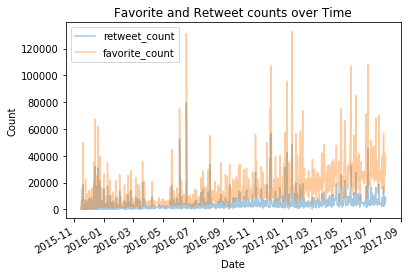

In [94]:
df[['retweet_count', 'favorite_count']][::-1].plot(kind='line', alpha = 0.4);
plt.title('Favorite and Retweet counts over Time');
plt.xlabel('Date');
plt.ylabel('Count');

From the above plot, there seems to be a gradual increase in favorite count and retweet count over time. Also there are few instances of very large values of favorite and retweet counts and these can be said to be outliers in the favorite and retweet count columns.